In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df1 = pd.read_csv("diabetes.csv")

In [3]:
def DataIn(df):
    print(df.info())
    print("-"* 20)
    print(df.dtypes)
    print("-"* 20)
    d = df.isnull().sum()
    print(d[d>0])
DataIn(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
--------------------
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float6

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
BMI_Labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']

df["BMI_Cat"] = pd.cut(df['BMI'], [0,18.5,25,30,df['BMI'].max()], labels=BMI_Labels)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat
0,6,148,72,35,0,33.6,0.627,50,1,Obesity
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Healthy weight
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obesity


# __Glucose__
#### A blood sugar level less than 140 mg/dL (7.8 mmol/L) is considered normal.
#### A blood sugar level from 140 to 199 mg/dL (7.8 to 11.0 mmol/L) is considered prediabetes. This is sometimes referred to as impaired glucose tolerance.
#### A blood sugar level of 200 mg/dL (11.1 mmol/L) or higher indicates type 2 diabetes.

In [9]:
df["Glucose_Cat"] = df["Glucose"].apply(lambda x: "Normal" if x < 140 else ("Prediabetes" if 140 <= x <= 199 else "Risk"))

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,Glucose_Cat
0,6,148,72,35,0,33.6,0.627,50,1,Obesity,Prediabetes
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Healthy weight,Prediabetes
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity,Normal


In [13]:
df['Insulin']=df['Insulin'].replace(0, np.nan)

df['Insulin'] = df['Insulin'].fillna(df.groupby(['BMI_Cat', 'Outcome', 'Glucose_Cat'])['Insulin'].transform('median'))


In [16]:
df['Insulin_Cat'] = df['Insulin'].apply(lambda x: "Normal" if (16 <= x <= 166) else "Abnormal")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,Glucose_Cat,Insulin_Cat
0,6,148,72,35,225.0,33.6,0.627,50,1,Obesity,Prediabetes,Abnormal
1,1,85,66,29,85.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183,64,0,144.0,23.3,0.672,32,1,Healthy weight,Prediabetes,Normal
3,1,89,66,23,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity,Normal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,Obesity,Normal,Abnormal
764,2,122,70,27,105.0,36.8,0.340,27,0,Obesity,Normal,Normal
765,5,121,72,23,112.0,26.2,0.245,30,0,Overweight,Normal,Normal
766,1,126,60,0,152.5,30.1,0.349,47,1,Obesity,Normal,Normal


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   758 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   BMI_Cat                   757 non-null    category
 10  Glucose_Cat               768 non-null    object  
 11  Insulin_Cat               768 non-null    object  
dtypes: category(1), float64(3), int64(6), object(2)
memory usage: 67.1+ KB


## Check Linear Relation Of Numeric Variable 

In [18]:
cat_var=['BMI_Cat','Glucose_Cat','Insulin_Cat']
num_var=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

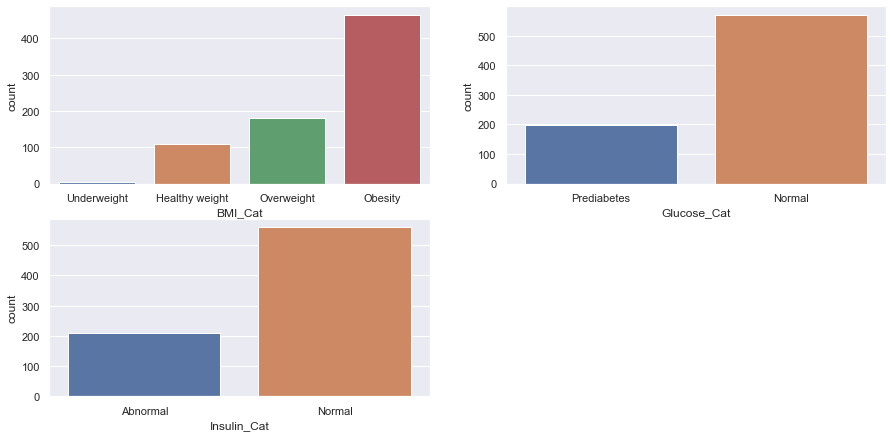

In [21]:
# Boxplot of Categorial Variables

## finding the count of BMI_Cat, Gluscose_Cat, Insulin_Cat

plt.figure(figsize=(15,15))
sns.set(style = 'darkgrid')
i = 1

for col in cat_var:
    plt.subplot(4,2,i)
    sns.countplot(data = df, x = col)
    i = i + 1
plt.show()


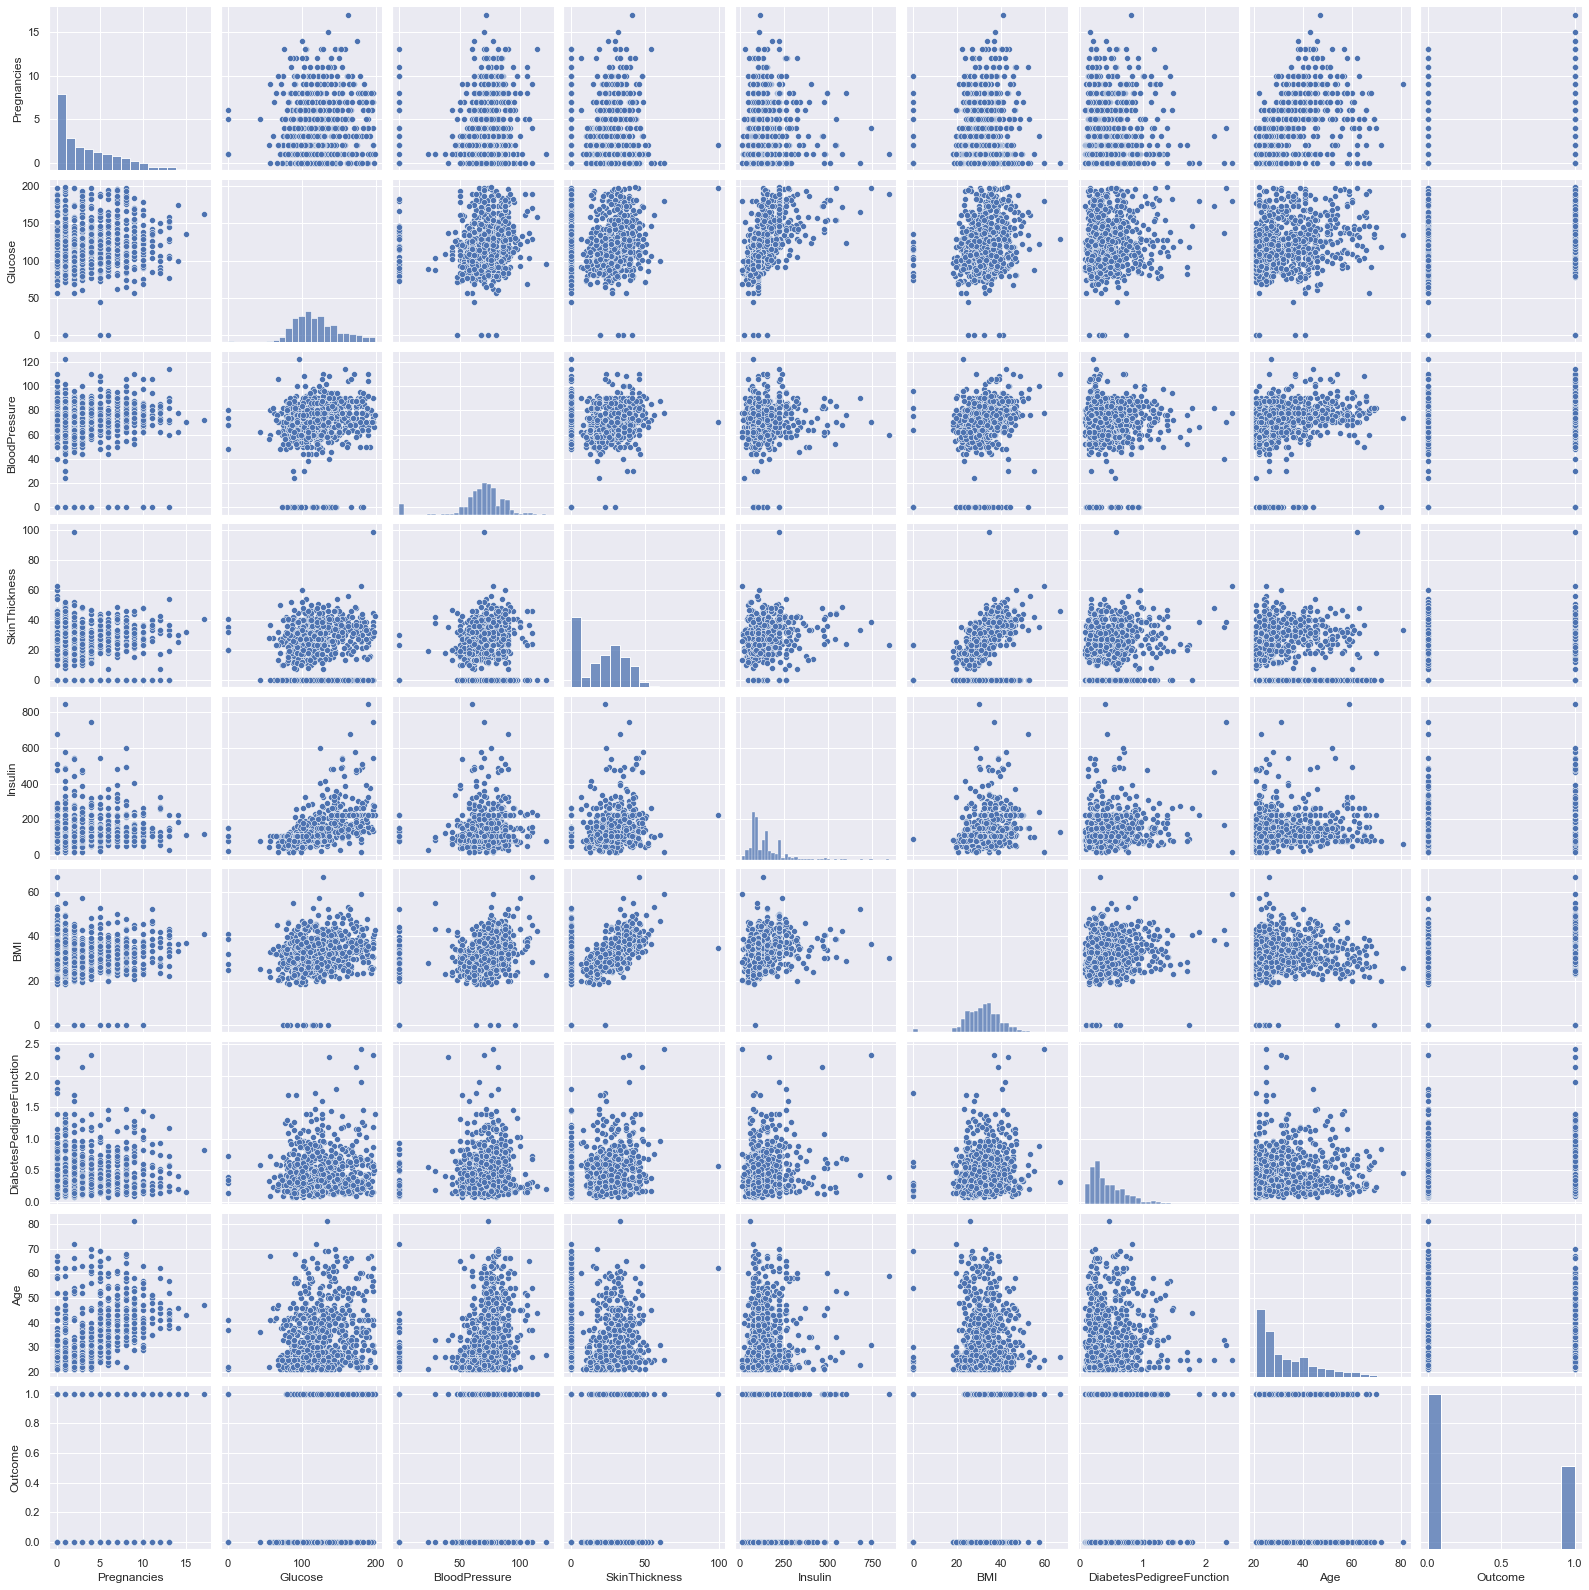

In [22]:
sns.pairplot(df, vars = num_var)
plt.show()

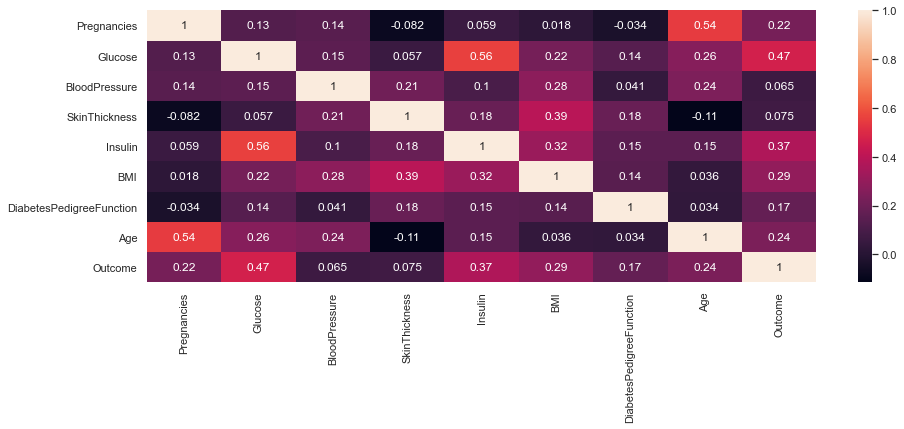

In [23]:
cor = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor, annot = True)
plt.show()